In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
import sklearn.cluster
import sklearn.preprocessing
import sklearn.neural_network
import sklearn.linear_model
import sklearn.model_selection
import torch
import torchvision
import torchvision.datasets
import torchvision.models
import torchvision.transforms

In [2]:
# baja y lee los datos
training = torchvision.datasets.FashionMNIST(root="./", train=True, download=True)
train_loader = torch.utils.data.DataLoader(training,shuffle=True)

testing = torchvision.datasets.FashionMNIST(root="./", train=False, download=True, 
                                            transform=torchvision.transforms.Normalize((0), (1.0)))
testing_loader = torch.utils.data.DataLoader(testing, shuffle=True)

torch.Size([60000, 28, 28])
['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


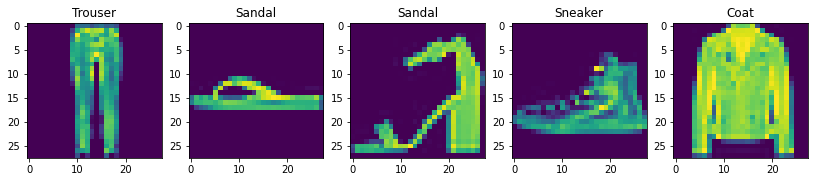

In [3]:
# muestra algunos ejemplos
print(train_loader.dataset.data.size())
print(train_loader.dataset.classes)
n_items = train_loader.dataset.data.size()[0]
random_items = np.random.choice(np.arange(n_items), 5)

plt.figure(figsize=(14,5))
for i in range(5):
    plt.subplot(1,5,i+1)
    item  = random_items[i]
    plt.imshow(train_loader.dataset.data[item])
    plt.title(train_loader.dataset.classes[train_loader.dataset.targets[item]] )

In [4]:
# Selecciona y normaliza 600 para entrenar
train  = train_loader.dataset.data[:600].float()
target = train_loader.dataset.targets[:600].float()

test  = train_loader.dataset.data[600:1200].float()
target_test = train_loader.dataset.targets[600:1200].float()

mean = train.mean(dim=0)
mean_t=train
std = train.std(dim=0)
std[std==0]=1.0

for i in range(len(train)):
    train[i] = (train[i]-mean)/std
np.shape(train)


torch.Size([600, 28, 28])

In [5]:
x_train = train.unsqueeze(1)
np.shape(x_train)

torch.Size([600, 1, 28, 28])

In [63]:
n = torch.nn.Conv2d(1, 4, 4, stride=1) # in-channels = 1, out-channels = 4, kernel=4
new_tensor = n(x_train)
print(new_tensor.size())

m=torch.nn.MaxPool2d(kernel_size=3, stride=2)
new_tensor_1=m(new_tensor)
print(new_tensor_1.size())

ñ=torch.nn.Conv2d(4, 1, 2, stride=1)
new_tensor_2=ñ(new_tensor_1)
print(new_tensor_2.size())

new_tensor_3=new_tensor_2.reshape(new_tensor_2.size(0), -1)
print(new_tensor_3.size)
 
#new_tensor_4=new_tensor_3.squeeze(1)
#print(new_tensor_4.size())
p=torch.nn.Linear(121,64)
new_tensor_5=p(new_tensor_3)
print(new_tensor_5.size())

q=torch.nn.Linear(64,10)
new_tensor_6=q(new_tensor_5)
print(new_tensor_6.size())

torch.Size([600, 4, 25, 25])
torch.Size([600, 4, 12, 12])
torch.Size([600, 1, 11, 11])
<built-in method size of Tensor object at 0x7f863143feb0>
torch.Size([600, 64])
torch.Size([600, 10])


In [65]:
model_1 = torch.nn.Sequential(
    torch.nn.Conv2d(1, 4, kernel_size=4, stride=1),
    torch.nn.MaxPool2d(kernel_size=3,stride=2),
    torch.nn.Conv2d(4, 1, kernel_size=2, stride=1)
)

model_2=torch.nn.Sequential(
    torch.nn.Linear(121,64),
    torch.nn.Linear(64,10)
)

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_1.parameters(), lr=0.2) #lr: learning rate
epochs = 60
loss_values = np.zeros(epochs)
F1_values_train = np.zeros(epochs)
F1_values_test = np.zeros(epochs)


In [68]:
for epoch in range(epochs):
    X_new = x_train
    inputs = torch.autograd.Variable(torch.Tensor(X_new).float())
    targets = torch.autograd.Variable(torch.Tensor(target).long())
    
    optimizer.zero_grad()
    out = model_1(inputs)
    out= out.reshape(out.size(0), -1)
    out1 = model_2(out)
    loss = criterion(out1, targets)
    loss.backward()
    optimizer.step()
    
    values, Y_predicted = torch.max(out1.data, 1)
    loss_values[epoch] = loss.item()
    F1_values_train[epoch] = sklearn.metrics.f1_score(targets, Y_predicted, average='macro')
    

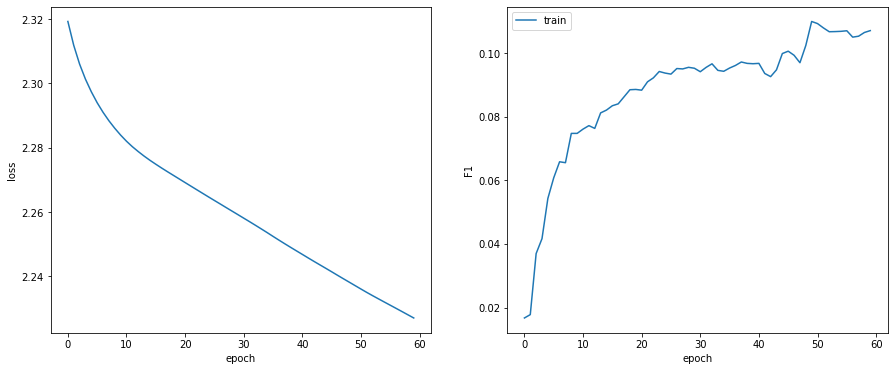

In [69]:
fig=plt.figure(figsize=(15, 6)) 
ax1=plt.subplot(1,2,1)
ax1.plot(np.arange(epochs), loss_values)
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss')


ax2=plt.subplot(1,2,2)
ax2.plot(np.arange(epochs), F1_values_train, label='train')
ax2.set_xlabel('epoch')
ax2.set_ylabel('F1')
ax2.legend()

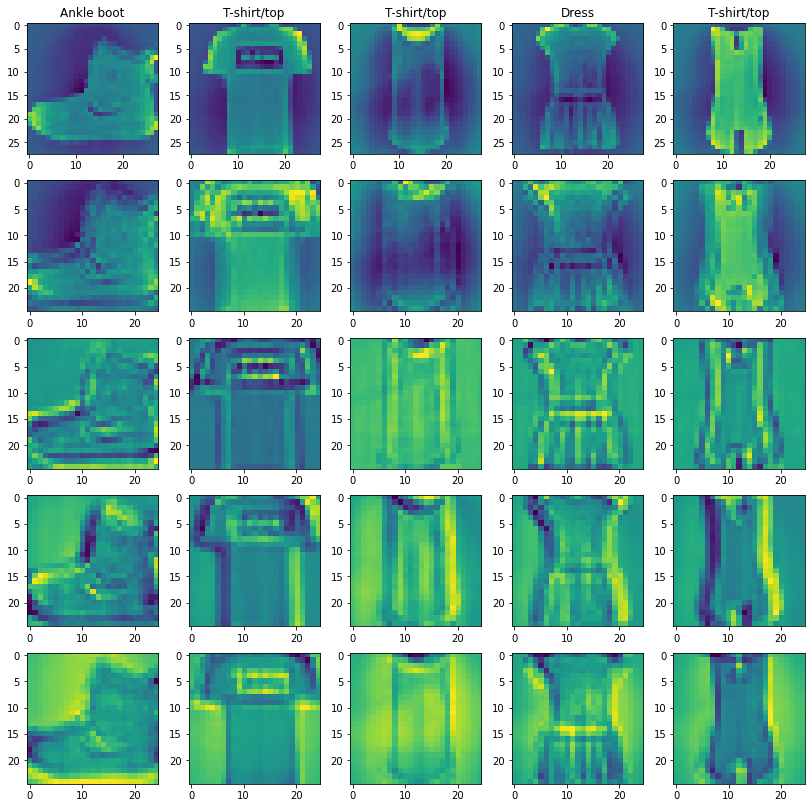

In [12]:
#muestra los resultados de las cuatro capas de convolucion
plt.figure(figsize=(14,14))
for i in range(5):
    plt.subplot(5,5,i+1)
    plt.imshow(x_train[i][0].detach().numpy())
    plt.title(train_loader.dataset.classes[train_loader.dataset.targets[i]] )
    
    for j in range(4):
        plt.subplot(5,5,(i+1)+5*(j+1))
        plt.imshow(new_tensor[i][j].detach().numpy())